# BIOS512 Assignment #5

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
turbines = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv', col_types=cols()) 
turbines |> head()   


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

In [3]:
turbines2 = turbines |> select(province_territory)
turbines2 |> head()


# we can also view province_territory by using the pull command and then the fct_infreq and levels commands
turbines3 = turbines |> pull(province_territory)
turbines3 |> fct_infreq() |> fct_rev() |> levels()
turbines3 |> table() # we can view it with a table

# or with a count from the original data and specifying which column we want to count
turbines |> count(province_territory) 


province_territory
<chr>
Alberta
Alberta
Alberta
Alberta
Alberta
Alberta


[1] "Yukon"                     "Northwest Territories"    
 [3] "Newfoundland and Labrador" "Prince Edward Island"     
 [5] "New Brunswick"             "Manitoba"                 
 [7] "Saskatchewan"              "British Columbia"         
 [9] "Nova Scotia"               "Alberta"                  
[11] "Quebec"                    "Ontario"

turbines3
                  Alberta          British Columbia                  Manitoba 
                      900                       292                       133 
            New Brunswick Newfoundland and Labrador     Northwest Territories 
                      119                        27                         4 
              Nova Scotia                   Ontario      Prince Edward Island 
                      310                      2663                       104 
                   Quebec              Saskatchewan                     Yukon 
                     1991                       153                         2 

province_territory,n
<chr>,<int>
Alberta,900
British Columbia,292
Manitoba,133
New Brunswick,119
Newfoundland and Labrador,27
Northwest Territories,4
Nova Scotia,310
Ontario,2663
Prince Edward Island,104


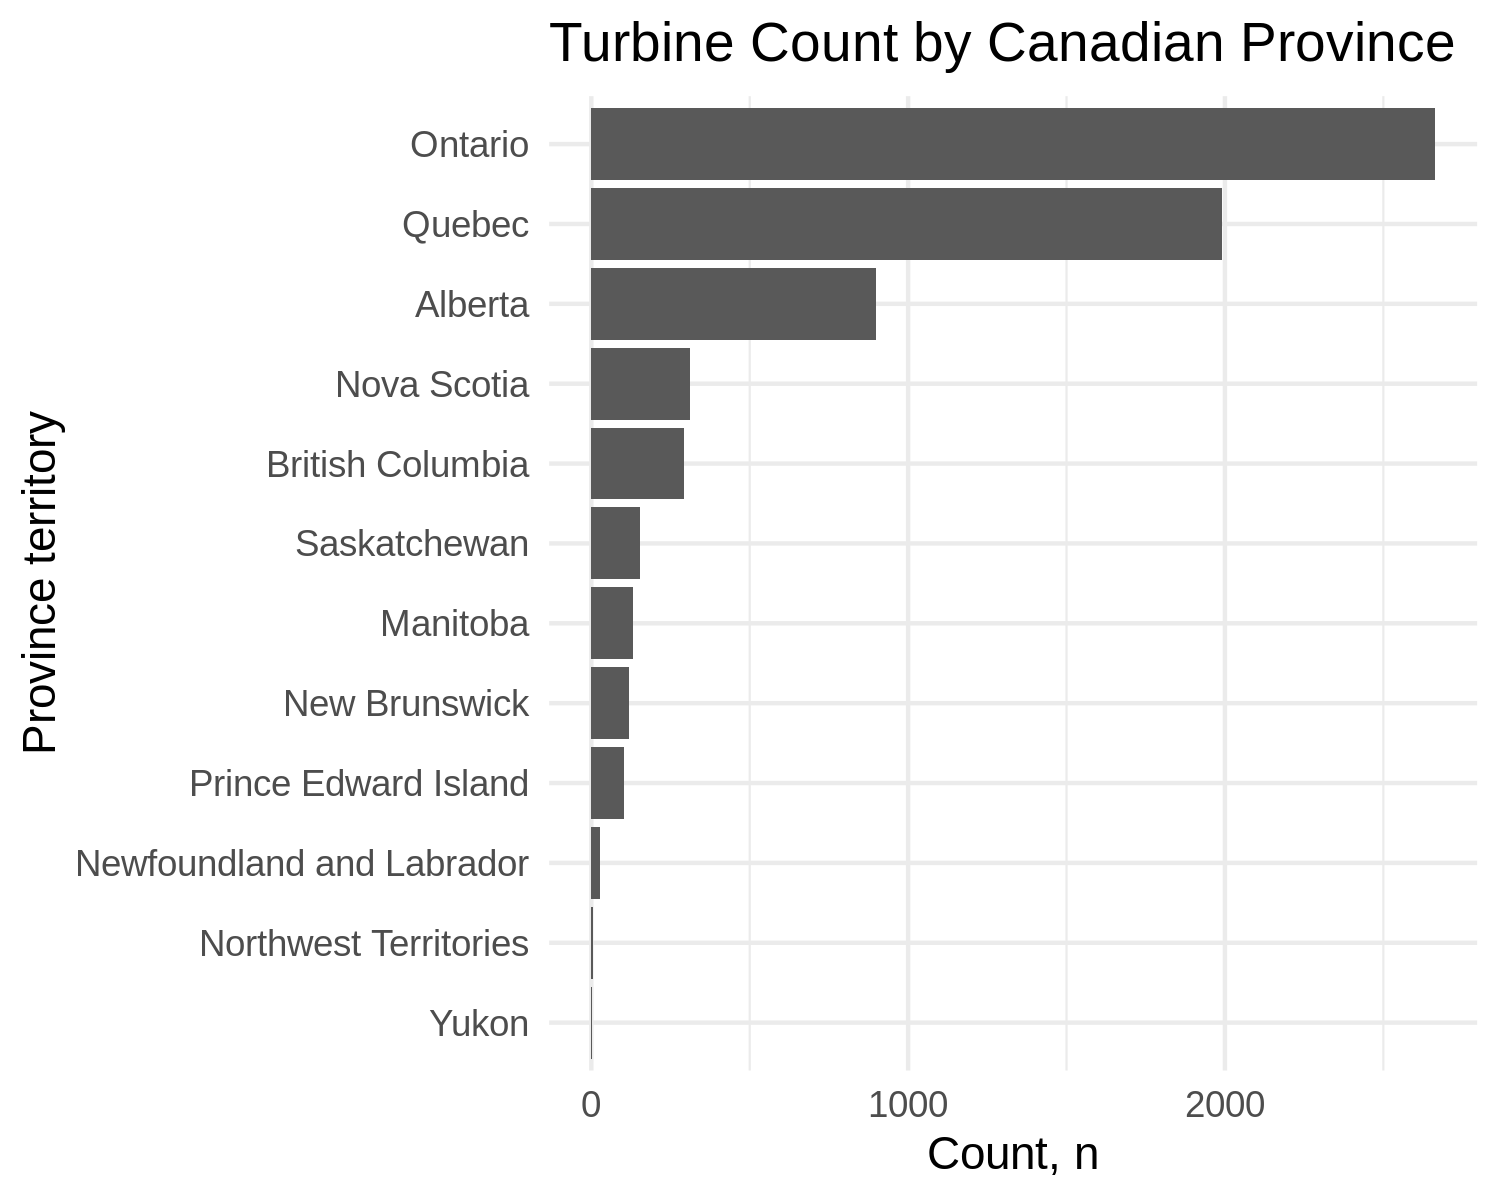

In [10]:
turbines_province = turbines |> 
        select(province_territory)  |>   
        mutate(province_territory = province_territory |>
        fct_infreq() |> fct_rev()
              )

p=ggplot(turbines_province, aes(y=province_territory)) + geom_bar() +
        theme_minimal() + labs(x="Count, n", y= 'Province territory', title='Turbine Count by Canadian Province') 
       
p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [8]:
turbines_manufacturer = turbines |> pull(manufacturer)  
turbines_manufacturer |> fct_infreq() |> fct_rev() |> levels()
turbines_manufacturer |> table()

[1] "Tacke"                    "Pfleiderer"              
 [3] "Leitwind"                 "Lagerwey"                
 [5] "EWT"                      "Bonus"                   
 [7] "Turbowinds"               "Northwind"               
 [9] "Samsung Renewable Energy" "DeWind"                  
[11] "Windmatic"                "Gamesa"                  
[13] "Vensys"                   "Suzlon"                  
[15] "Nordex"                   "Acciona"                 
[17] "Acciona Wind Power"       "NEG Micon"               
[19] "Senvion"                  "Enercon"                 
[21] "Siemens"                  "GE"                      
[23] "Vestas"

turbines_manufacturer
                 Acciona       Acciona Wind Power                    Bonus 
                      34                       40                        2 
                  DeWind                  Enercon                      EWT 
                       5                      960                        2 
                  Gamesa                       GE                 Lagerwey 
                       8                     1725                        2 
                Leitwind                NEG Micon                   Nordex 
                       1                      132                       20 
               Northwind               Pfleiderer Samsung Renewable Energy 
                       3                        1                        4 
                 Senvion                  Siemens                   Suzlon 
                     643                     1248                       15 
                   Tacke               Turbowinds                 

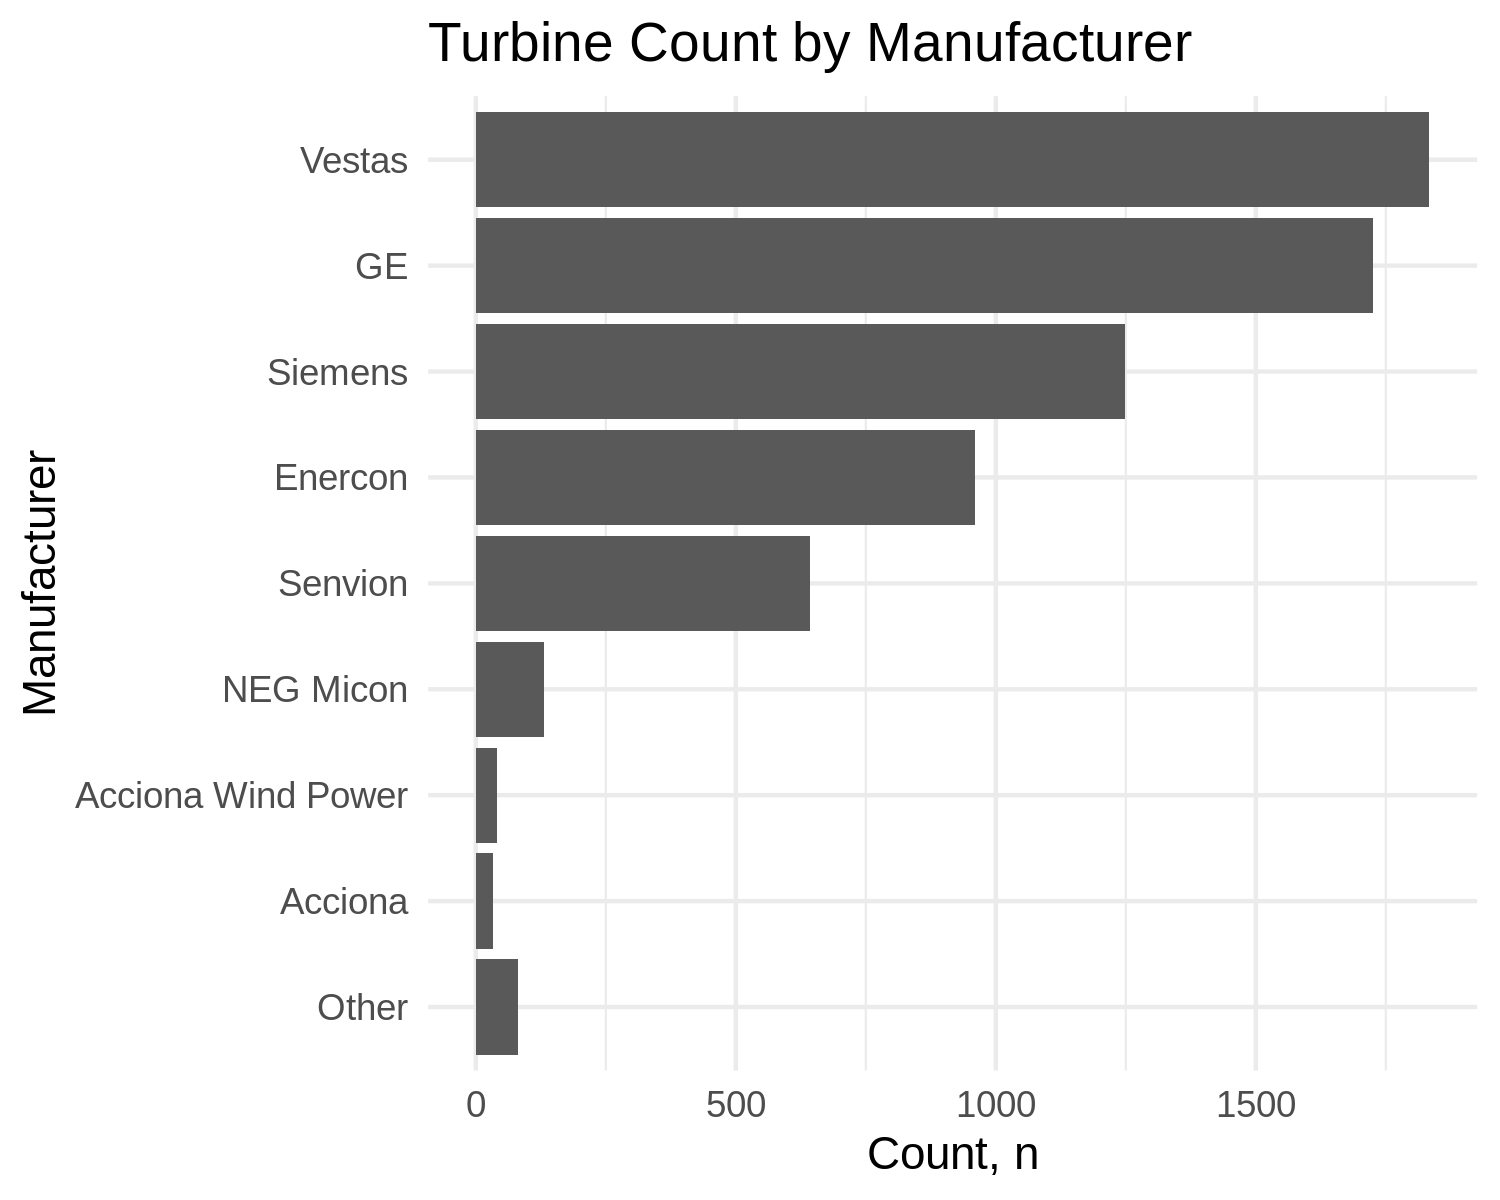

In [11]:
turbines_manufacturer = turbines |> select(manufacturer)  |>   

        mutate(manufacturer = manufacturer |>
        fct_lump(n=8) |>
        fct_infreq() |> fct_rev() |>
        fct_relevel('Other'))

p=ggplot(turbines_manufacturer, aes(y=manufacturer)) + geom_bar() +
        theme_minimal() + labs(x="Count, n", y= 'Manufacturer', title='Turbine Count by Manufacturer') 
       
p

